 <h3><b><center>Assignment 04:</center></b></h3>
 <h4><b><center>Analysing Morphological Data in a UD Corpus</center></b></h4>
 <p>Shashikala Kankanamge (6648398)</p>

<h4><b>Task 1: Loading a CoNLL-U file into Pandas </b></h4>

In [138]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None 

In [139]:
file_path="./eu_bdt-ud-dev.conllu"
with open  (file_path ,'r', encoding='utf-8') as file :
    lines =file.readlines()

data = []
for line in lines :
    sentence =[]
    
    line=line.strip()
    if line.startswith('#'):
        continue
    if not line :
        continue 
   

    token_info=line.split('\t')
    if len(token_info)==10:
        sentence.append(token_info)

    if line=='':
        if sentence :
            data.append(sentence)
            sentence = []

    if sentence:
        data.append(sentence)

columns = ['id', 'form', 'lemma', 'upos', 'xpos', 'feats',
           'head', 'deprel', 'deps', 'misc']
df = pd.DataFrame([item for sublist in data for item in sublist],
                  columns=columns)

pd.set_option('display.max_columns', None)  
df.head()



,id,form,lemma,upos,xpos,feats,head,deprel,deps,misc
0,1,Atenasen,Atenas,PROPN,_,Case=Ine|Definite=Def|Number=Sing,8,obl,_,_
1,2,ordea,ordea,CCONJ,_,_,8,advmod,_,SpaceAfter=No
2,3,",",",",PUNCT,_,_,2,punct,_,_
3,4,beste,beste,DET,_,_,6,det,_,_
4,5,bost,bost,NUM,_,NumType=Card,6,nummod,_,_


<h4><b>Task 2: Handling Missing Data and Cleaning Out Variables</b></h4>

 a) Convert all values consisting of an underscore into an appropriate missing data type.

In [142]:

df = df.replace('_',pd.NA)
df.head()


,id,form,lemma,upos,xpos,feats,head,deprel,deps,misc
0,1,Atenasen,Atenas,PROPN,<NA>,Case=Ine|Definite=Def|Number=Sing,8,obl,<NA>,<NA>
1,2,ordea,ordea,CCONJ,<NA>,<NA>,8,advmod,<NA>,SpaceAfter=No
2,3,",",",",PUNCT,<NA>,<NA>,2,punct,<NA>,<NA>
3,4,beste,beste,DET,<NA>,<NA>,6,det,<NA>,<NA>
4,5,bost,bost,NUM,<NA>,NumType=Card,6,nummod,<NA>,<NA>


In [143]:
#b)
df['feats'] = df['feats'].fillna("")

df.head()

,id,form,lemma,upos,xpos,feats,head,deprel,deps,misc
0,1,Atenasen,Atenas,PROPN,<NA>,Case=Ine|Definite=Def|Number=Sing,8,obl,<NA>,<NA>
1,2,ordea,ordea,CCONJ,<NA>,,8,advmod,<NA>,SpaceAfter=No
2,3,",",",",PUNCT,<NA>,,2,punct,<NA>,<NA>
3,4,beste,beste,DET,<NA>,,6,det,<NA>,<NA>
4,5,bost,bost,NUM,<NA>,NumType=Card,6,nummod,<NA>,<NA>


In [144]:
#c)

threshold = len(df) * 0.8

columns_before = df.columns.tolist()  
df_cleaned = df.dropna(axis=1, thresh=threshold)
columns_after = df_cleaned.columns.tolist()  

removed_columns = set(columns_before) - set(columns_after)

print(f"All Columns    : {columns_before}")
print(f"Updated Columns: {columns_after}")
print(f"Disappeared columns: {removed_columns}")


All Columns    : ['id', 'form', 'lemma', 'upos', 'xpos', 'feats', 'head', 'deprel', 'deps', 'misc']
Updated Columns: ['id', 'form', 'lemma', 'upos', 'feats', 'head', 'deprel']
Disappeared columns: {'misc', 'xpos', 'deps'}


 <h4><b>Task 3: Reduction to Datapoints of Interest</b></h4>

In [146]:
#a)

reduced_df = df_cleaned[df_cleaned['lemma'].isin(['izan', 'ukan'])]

reduced_df = reduced_df[reduced_df['upos'].isin(['VERB', 'AUX'])]

reduced_df.head()




,id,form,lemma,upos,feats,head,deprel
7,8,izan,izan,VERB,Aspect=Perf|VerbForm=Part,0,root
15,6,da,izan,AUX,Mood=Ind|Number[abs]=Sing|Person[abs]=3|VerbForm=Fin,5,aux
29,12,zen,izan,AUX,Mood=Ind|Number[abs]=Sing|Person[abs]=3|VerbForm=Fin,11,aux
34,4,den,izan,AUX,Mood=Ind|Number[abs]=Sing|Person[abs]=3|VerbForm=Fin,3,aux
39,2,izan,izan,VERB,Aspect=Perf|VerbForm=Part,4,acl


In [147]:
# b)
pattern = r'(\w+)=([\w\-]+)'
valid_feats = reduced_df['feats'].dropna()
matches = valid_feats.str.extractall(pattern)
unique_features = matches[0].unique()
unique_features


array(['Aspect', 'VerbForm', 'Mood', 'Polarity', 'Case', 'Definite',
       'Gender', 'Polite', 'Number'], dtype=object)

VerbForm

In [149]:
#c)
features = reduced_df['feats']

split_feats = features.str.split('|')
all_features = [feature for row in split_feats for feature in row]

feature_counts = pd.Series(all_features).value_counts()
print(feature_counts)
print("\n")



VerbForm=Fin        1401
Mood=Ind            1305
Person[abs]=3       1259
Number[abs]=Sing     935
Aspect=Prog          603
Number[abs]=Plur     386
VerbForm=Part        281
Person[erg]=3        191
Number[erg]=Sing     164
Aspect=Perf          158
Number[erg]=Plur      83
Aspect=Prosp          82
Person[abs]=1         55
Number[dat]=Sing      54
Person[erg]=1         50
Person[dat]=3         45
Case=Abs              40
Definite=Def          31
VerbForm=Inf          25
Number=Sing           24
Person[dat]=1         20
Polarity=Pos          17
Mood=Cnd              16
Number[dat]=Plur      13
Aspect=Imp            12
Definite=Ind          12
Case=Loc              11
Polite=Infm            9
Person[abs]=2          7
Number=Plur            7
Person[erg]=2          6
Gender=Fem             6
Case=Erg               5
Case=All               4
Case=Ins               3
Gender=Masc            3
Case=Ine               3
Case=Dat               2
Case=Abl               2
Person[dat]=2          2


In [150]:
uncommon_features = feature_counts[feature_counts < 50].index
print('Uncommon features: ',list(uncommon_features))
print("\n")



Uncommon features:  ['Person[dat]=3', 'Case=Abs', 'Definite=Def', 'VerbForm=Inf', 'Number=Sing', 'Person[dat]=1', 'Polarity=Pos', 'Mood=Cnd', 'Number[dat]=Plur', 'Aspect=Imp', 'Definite=Ind', 'Case=Loc', 'Polite=Infm', 'Person[abs]=2', 'Number=Plur', 'Person[erg]=2', 'Gender=Fem', 'Case=Erg', 'Case=All', 'Case=Ins', 'Gender=Masc', 'Case=Ine', 'Case=Dat', 'Case=Abl', 'Person[dat]=2', 'Case=Gen', 'Case=Ben', 'Gender[erg]=Masc', 'Polite[erg]=Infm', 'Case=Cau']




In [151]:
mask = []
for feats in reduced_df['feats']:
    if pd.isna(feats):
        mask.append(True)
    else:
        row_features = feats.split('|')
        if any(feature in uncommon_features for feature in row_features):
            mask.append(False)  #remove
        else:
            mask.append(True)  # Keep 

filtered_df = reduced_df[mask].reset_index(drop=True)
filtered_df

,id,form,lemma,upos,feats,head,deprel
0,8,izan,izan,VERB,Aspect=Perf|VerbForm=Part,0,root
1,6,da,izan,AUX,Mood=Ind|Number[abs]=Sing|Person[abs]=3|VerbForm=Fin,5,aux
2,12,zen,izan,AUX,Mood=Ind|Number[abs]=Sing|Person[abs]=3|VerbForm=Fin,11,aux
3,4,den,izan,AUX,Mood=Ind|Number[abs]=Sing|Person[abs]=3|VerbForm=Fin,3,aux
4,2,izan,izan,VERB,Aspect=Perf|VerbForm=Part,4,acl
...,...,...,...,...,...,...,...
1488,6,duten,ukan,VERB,VerbForm=Fin,7,acl
1489,6,diren,izan,AUX,Mood=Ind|Number[abs]=Plur|Person[abs]=3|VerbForm=Fin,4,aux
1490,12,duela,ukan,VERB,Aspect=Prog|Mood=Ind|Number[abs]=Sing|Number[erg]=Sing|Person[abs]=3|Person[erg]=3|VerbForm=Fin,9,advcl
1491,21,izan,izan,AUX,Aspect=Perf|VerbForm=Part,20,cop


 <h4><b>Task 4: Ingesting Data From a Complex Text Format</b></h4>

In [178]:
feature_columns = set()

for feats in filtered_df['feats']:
        features = feats.split('|') 
        for feat in features:
            feature_name = feat.split('=')[0]  
            feature_columns.add(feature_name)

for feature in feature_columns:
    feature_values = []
    
    for feats in filtered_df['feats']:
        match = re.search(rf'{feature}=([^|]+)', feats)
        if match:
            feature_values.append(match.group(1))  
        else:
            feature_values.append(pd.NA)  
    
    filtered_df[feature] = feature_values
filtered_df['feats'] = filtered_df.pop('feats')
filtered_df.head()


,id,form,lemma,upos,head,deprel,Person[abs],Number[abs],Person[erg],Number[erg],Aspect,Mood,VerbForm,Abs,Erg,feats
0,8,izan,izan,VERB,0,root,<NA>,<NA>,<NA>,<NA>,Perf,<NA>,Part,NaN,NaN,Aspect=Perf|VerbForm=Part
1,6,da,izan,AUX,5,aux,<NA>,<NA>,<NA>,<NA>,<NA>,Ind,Fin,NaN,NaN,Mood=Ind|Number[abs]=Sing|Person[abs]=3|VerbForm=Fin
2,12,zen,izan,AUX,11,aux,<NA>,<NA>,<NA>,<NA>,<NA>,Ind,Fin,NaN,NaN,Mood=Ind|Number[abs]=Sing|Person[abs]=3|VerbForm=Fin
3,4,den,izan,AUX,3,aux,<NA>,<NA>,<NA>,<NA>,<NA>,Ind,Fin,NaN,NaN,Mood=Ind|Number[abs]=Sing|Person[abs]=3|VerbForm=Fin
4,2,izan,izan,VERB,4,acl,<NA>,<NA>,<NA>,<NA>,Perf,<NA>,Part,NaN,NaN,Aspect=Perf|VerbForm=Part


In [154]:
#b)
print(filtered_df.columns)
def combine_person_number(person, number):
    if pd.isna(person) or pd.isna(number):
        return pd.NA
        
        return f"{person}{str(number)[0].lower()}" 

filtered_df['Abs'] = [combine_person_number(person, number) for person, number in zip(filtered_df['Person[abs]'], filtered_df['Number[abs]'])]

filtered_df['Erg'] = [combine_person_number(person, number) for person, number in zip(filtered_df['Person[erg]'], filtered_df['Number[erg]'])]

if 'Person[dat]' in filtered_df.columns and 'Number[dat]' in filtered_df.columns:
    filtered_df['Dat'] = [combine_person_number(person, number) for person, number in zip(filtered_df['Person[dat]'], filtered_df['Number[dat]'])]

filtered_df


Index(['id', 'form', 'lemma', 'upos', 'head', 'deprel', 'Person[abs]',
       'Number[abs]', 'Person[erg]', 'Number[erg]', 'Aspect', 'Mood',
       'VerbForm', 'feats'],
      dtype='object')


,id,form,lemma,upos,head,deprel,Person[abs],Number[abs],Person[erg],Number[erg],Aspect,Mood,VerbForm,feats,Abs,Erg
0,8,izan,izan,VERB,0,root,<NA>,<NA>,<NA>,<NA>,Perf,<NA>,Part,Aspect=Perf|VerbForm=Part,<NA>,<NA>
1,6,da,izan,AUX,5,aux,<NA>,<NA>,<NA>,<NA>,<NA>,Ind,Fin,Mood=Ind|Number[abs]=Sing|Person[abs]=3|VerbForm=Fin,<NA>,<NA>
2,12,zen,izan,AUX,11,aux,<NA>,<NA>,<NA>,<NA>,<NA>,Ind,Fin,Mood=Ind|Number[abs]=Sing|Person[abs]=3|VerbForm=Fin,<NA>,<NA>
3,4,den,izan,AUX,3,aux,<NA>,<NA>,<NA>,<NA>,<NA>,Ind,Fin,Mood=Ind|Number[abs]=Sing|Person[abs]=3|VerbForm=Fin,<NA>,<NA>
4,2,izan,izan,VERB,4,acl,<NA>,<NA>,<NA>,<NA>,Perf,<NA>,Part,Aspect=Perf|VerbForm=Part,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,6,duten,ukan,VERB,7,acl,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Fin,VerbForm=Fin,<NA>,<NA>
1489,6,diren,izan,AUX,4,aux,<NA>,<NA>,<NA>,<NA>,<NA>,Ind,Fin,Mood=Ind|Number[abs]=Plur|Person[abs]=3|VerbForm=Fin,<NA>,<NA>
1490,12,duela,ukan,VERB,9,advcl,<NA>,<NA>,<NA>,<NA>,Prog,Ind,Fin,Aspect=Prog|Mood=Ind|Number[abs]=Sing|Number[erg]=Sing|Person[abs]=3|Person[erg]=3|VerbForm=Fin,<NA>,<NA>
1491,21,izan,izan,AUX,20,cop,<NA>,<NA>,<NA>,<NA>,Perf,<NA>,Part,Aspect=Perf|VerbForm=Part,<NA>,<NA>


In [155]:
#c)
categorical_columns = [
    'Mood', 'Number[abs]', 'Person[abs]', 'Abs', 'Erg', 'Dat', 
    'Case', 'Gender', 'Polarity', 'Polite', 'VerbForm'
]

for col in categorical_columns:
    if col in filtered_df.columns:
        filtered_df[col] = filtered_df[col].astype('category')

print(filtered_df.dtypes)


id               object
form             object
lemma            object
upos             object
head             object
deprel           object
Person[abs]    category
Number[abs]    category
Person[erg]      object
Number[erg]      object
Aspect           object
Mood           category
VerbForm       category
feats            object
Abs            category
Erg            category
dtype: object


<h4><b>Task 5: Research Question 1– Syncretis</b></h4> 

In [157]:
izan_ukan_df = filtered_df[filtered_df['lemma'].isin(['izan', 'ukan'])]
reduced_df = izan_ukan_df.drop_duplicates(subset=['form', 'feats'])
syncretism_check = reduced_df.groupby('form')['feats'].nunique()

syncretic_forms = syncretism_check[syncretism_check > 1]

syncretic_forms


form
bada       2
badu       2
badugu     2
baita      3
baitira    2
baitzen    2
da         2
dela       3
den        3
denean     2
denez      2
dira       2
direla     3
diren      3
duela      2
duelako    2
dugun      2
dutela     2
duten      2
gara       2
ginen      2
izan       2
naiz       2
nintzen    2
zela       2
zelako     2
zen        2
zirela     2
ziren      2
zuela      2
zuen       2
Name: feats, dtype: int64

<h4><b> Task 6: Research Question 2– Frequencies of Forms and Features</b></h4>

In [159]:
#a)

izan_ukan_df = filtered_df[filtered_df['lemma'].isin(['izan', 'ukan'])]

form_feature_counts = izan_ukan_df.groupby(['form', 'feats']).size().reset_index(
    name='count')
form_feature_counts



,form,feats,count
0,DUELA,Aspect=Prog|Mood=Ind|Number[abs]=Sing|Number[erg]=Sing|Person[abs]=3|Person[erg]=3|VerbForm=Fin,1
1,Izan,Aspect=Perf|VerbForm=Part,1
2,Izango,Aspect=Prosp|VerbForm=Part,1
3,bada,Aspect=Prog|Mood=Ind|Number[abs]=Sing|Person[abs]=3|VerbForm=Fin,3
4,bada,Mood=Ind|Number[abs]=Sing|Person[abs]=3|VerbForm=Fin,4
...,...,...,...
123,zuela,Aspect=Prog|Mood=Ind|Number[abs]=Sing|Number[erg]=Sing|Person[abs]=3|Person[erg]=3|VerbForm=Fin,5
124,zuela,VerbForm=Fin,2
125,zuen,Aspect=Prog|Mood=Ind|Number[abs]=Sing|Number[erg]=Sing|Person[abs]=3|Person[erg]=3|VerbForm=Fin,15
126,zuen,VerbForm=Fin,3


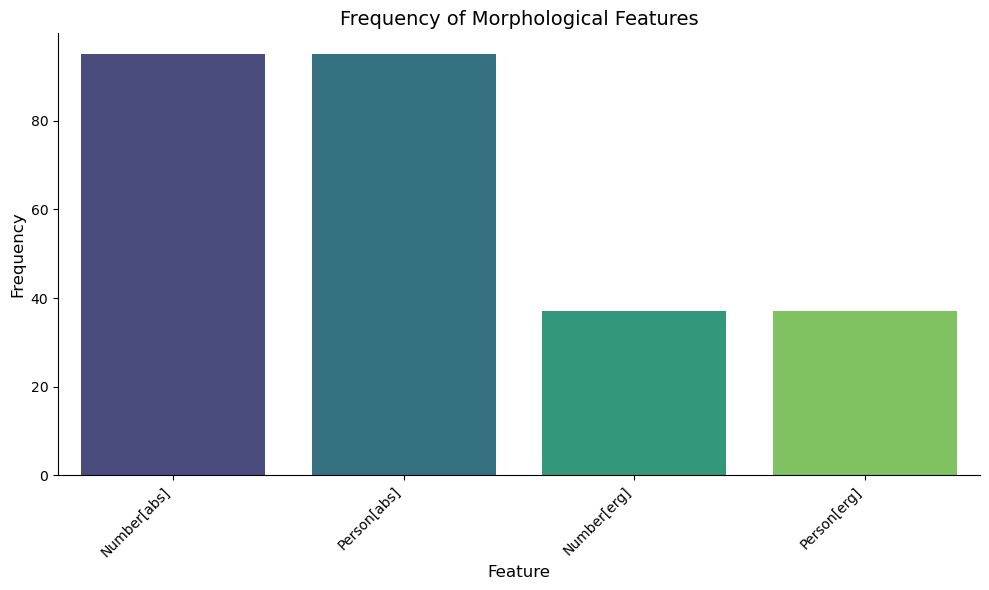

In [160]:
#b)
import matplotlib.pyplot as plt

relevant_features = ['Person[abs]', 'Number[abs]', 'Person[erg]', 'Number[erg]', 
                     'Person[dat]', 'Number[dat]']
feature_occurrences = []  # To store all extracted features

for feats in form_feature_counts['feats']:
    if isinstance(feats, str): 
        features = feats.split('|')  
        for feature in features:
            if feature.split('=')[0] in relevant_features: 
                feature_occurrences.append(feature.split('=')[0]) 

from collections import Counter
feature_freq = Counter(feature_occurrences)

feature_freq_df = pd.DataFrame(feature_freq.items(), columns=['Feature',
                                       'Count']).sort_values(by='Count', 
                                        ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_freq_df, x='Feature', y='Count', palette='viridis' ,
            hue='Feature',
    dodge=False,)
plt.title("Frequency of Morphological Features", fontsize=14)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
sns.despine()  
plt.tight_layout()
plt.show()


